In [4]:
%run imports.py
%run lib_util.py
%run lib_plot.py
%run lib_summary.py
%run lib_misc.py

# Folder Path

# Testing

In [5]:
# Get all data
rawDataSet = loadRawData()
subsampleDataSet = loadSubsampleData()
featureDataSet = loadFeatureData()
offlineCorrDataSet = loadOfflineCorrData()
# onlineCorrDataSet = load
lagDataSet = loadLagData()
leftTicksSet, rightTicksSet = loadFlashData(rawDataSet)

done loading raw data
done loading subsample data
done loading feature
done loading offline
done loading lag
done loading flashes


In [6]:
vizOverview(rawDataSet, subsampleDataSet, featureDataSet, offlineCorrDataSet, lagDataSet, plotSubsample=False)
# vizSubsampler(rawDataSet, subsampleDataSet)
vizOfflineCorr(offlineCorrDataSet)
# vizFeaturePlus(rawDataSet, featureDataSet)

key: t20180110004819_p2_sit_x1_raw.csv
key: t20180110004849_p2_sit_x1_raw.csv
key: t20180110004914_p2_sit_x1_raw.csv
key: t20180110004944_p2_sit_x1_raw.csv
key: t20180110005016_p2_sit_x1_raw.csv
key: t20180110005045_p2_sit_x1_raw.csv
key: t20180110005116_p2_sit_x1_raw.csv
key: t20180110005249_p2_noise_x1_raw.csv
key: t20180110005328_p2_noise_x1_raw.csv
key: t20180110005402_p2_noise_x1_raw.csv
key: t20180110005452_p2_noise_x1_raw.csv
key: t20180110005522_p2_noise_x1_raw.csv
key: t20180110005553_p2_noise_x1_raw.csv
done plotting overview
done plotting offline corr


In [99]:
rawDataSet = loadRawData()
featureDataset = loadFeatureData()

done loading raw data
done loading feature


In [ ]:
vizFeaturePlus(rawDataSet, featureDataset)

In [ ]:
vizMagnetometer(rawDataSet)

In [ ]:
vizOverview(rawDataSet, subsampleDataSet, featureDataSet, offlineCorrDataSet, lagDataSet, plotSubsample=False)


In [ ]:
leftTicksSet, rightTicksSet = loadFlashData()

In [ ]:
fileToUse = "t1489504654056_p1_sit_x2_raw.csv"
plt.clf()
fig = plt.figure()



for key in leftTicksSet.keys():
    if key==fileToUse:
        leftTicksSet[key]
    

In [ ]:
leftTicksSet


In [ ]:
# Overview

fileToUse = "t1489504654056_p1_sit_x2_raw.csv"

# Make folders
paths = [figurePath + "newfigs/"]
for path in paths:
    if not os.path.exists(path):
        os.makedirs(path)

# Iterate the data set
for key in rawDataSet:

    if key==fileToUse:
    
        # Get data
        rawData = rawDataSet[key]
        subsampleData = subsampleDataSet[key]
        featureData = featureDataSet[key[:-7]+"feature.csv"]
        offlineCorrData = offlineCorrDataSet[key[:-7]+"offline.csv"]
        lagData = lagDataSet[key[:-7]+"lag.csv"]

        # Plot magnetometer and feature
        path = figurePath + "newfigs/"
        if not os.path.exists(path):
            os.makedirs(path)
        figureFile = path + key[:-4] + ".pdf"

        #df1 = rawdata, df2 = subsampledata, df3 = featuremap, df4 = offlinecorr, df5 = lag
        fig, axs = plt.subplots(5, 1, sharex=True, sharey=False)
        fig.set_size_inches(15,15)
        
        plt.rcParams.update({'font.size': 12})

        
        subsampleData['magnitude'] = np.sqrt(np.square(subsampleData.x)+np.square(subsampleData.y)+np.square(subsampleData.z))
        axs[0].plot(subsampleData.timestamp, subsampleData.x, '-k')
        axs[1].plot(subsampleData.timestamp, subsampleData.y, '-k')
        axs[2].plot(subsampleData.timestamp, subsampleData.z, '-k')
        axs[3].plot(subsampleData.timestamp, subsampleData.magnitude, '-k')    
        
        axs[4].plot(featureData.timestamp, featureData.feature, '-k')
    #     axs[5].plot(df4.timestamp, df4.correlation, '-b')
    #     axs[5].set_ylim(-1,1)
    #     axs[6].plot(df5.timestamp, df5.lagtime, '-b')
        axs[0].set_title('x')
        axs[1].set_title('y')
        axs[2].set_title('z')
        axs[3].set_title('magnitude')
        axs[4].set_title('feature')
    #     axs[5].set_title('offlinecorr')
    #     axs[6].set_title('xcorr')
        rawLeft = [x for x in rawData.left if x != 0]
        rawRight = [x for x in rawData.right if x != 0]    
        for i in rawLeft:
            axs[0].axvline(i, color='b')
            axs[1].axvline(i, color='b')
            axs[2].axvline(i, color='b')      
            axs[3].axvline(i, color='b')    
            axs[4].axvline(i, color='b')
    #         axs[6].axvline(i, color='b')
        for i in rawRight:
            axs[0].axvline(i, color='r')
            axs[1].axvline(i, color='r')
            axs[2].axvline(i, color='r')    
            axs[3].axvline(i, color='r')    
            axs[4].axvline(i, color='r')    
    #         axs[6].axvline(i, color='r')
    #     if(saveToFile):
    #         fig.savefig(fileName)
    #     else:
        plt.show()        
        plt.close()    
    
print("done plotting overview")

In [ ]:
onlineCorrDataSet = loadLiveCorrData()
    
# Make folders
paths = [figurePath + "livecorr/"]
for path in paths:
    if not os.path.exists(path):
        os.makedirs(path)

fig, axs = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(15, 15) 
        
# Get all data
for key in onlineCorrDataSet:

    # Get data
    liveCorrData = onlineCorrDataSet[key]

    
    df = liveCorrData    
    df.timestamp = df.timestamp - df.timestamp[0]
    axs.plot(df.timestamp, df.correlation)
    axs.set_ylim(-1,1)
    axs.axhline(0.9)

figureFile = figurePath + "livecorr/" + "pilot1corr" + ".pdf"
plt.show()

print("done plotting online corr"    )

In [ ]:
offlineCorrDataSet = loadOfflineCorrData()
vizOfflineCorr(offlineCorrDataSet)

In [ ]:
thresholds = [0.70, 0.75, 0.8, 0.85, 0.9, 0.95]
outputSet = {}
for i in thresholds:
    averageTimes = []
    for key in onlineCorrDataSet.keys():
        df = onlineCorrDataSet[key]
        st = df.timestamp[0]
        dfsync = df[(df.correlation >= i) & (df.timestamp - st > IGNORE_TIME)]
        sync_time = dfsync.timestamp.values[0] - st if len(dfsync > 0) else -1
#         print(sync_time)
        if sync_time > 0:
            averageTimes.append(sync_time)
    outputSet[i] = np.mean(averageTimes) / 1000

In [ ]:
outputSet

In [9]:
# this block is used to specify which activity to use when generating the 3d plots
ACTIVITY = 'all'

In [14]:
# this block is used to calculate the true positives and false positives of the 3d plots the data is stored in tps and fps

# tp = syncRateFile("/Users/jwpilly/Research/Synchro/Study_v2/P1/synchro/t20170401112834_p1_sit/")
# fp = syncRateFile("/Users/jwpilly/Research/Synchro/Study_v2/P1/synchro/t20170401112834_p1_sit/", False)
# baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
# baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v1_750/"
baseFilePath = "/media/jwpilly/PillowDisk/Research/Synchro/figuredata/figure12/Study_v2"
tps = {}
fps = {}
ttot = {}
ftot = {}
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f in f]
    if ACTIVITY != "all":
        efolderpaths = [root + "/" + f + "/" for f in efolders if ACTIVITY in f]
    else:
        efolderpaths = [root + "/" + f + "/" for f in efolders]
    etps = [syncRateFile(efolderpaths[i]) for i in range(len(efolderpaths))]
    efps = [syncRateFile(efolderpaths[i], True) for i in range(len(efolderpaths))]
    for th in thresholds:
        if th not in tps:
            tps[th] = np.array([0 for i in times])
        if th not in fps:
            fps[th] = np.array([0 for i in times])
        if th not in ttot:
            ttot[th] = np.array([0 for i in times])
        if th not in ftot:
            ftot[th] = np.array([0 for i in times])
        for stps in etps:
            tps[th] += np.array(stps[th][0])
            ttot[th] += np.array(stps[th][1])
        for sfps in efps:
            fps[th] += np.array(sfps[th][0])
            ftot[th] += np.array(sfps[th][1])
        

error in /media/jwpilly/PillowDisk/Research/Synchro/figuredata/figure12/Study_v2/P1/synchro/t20170401121118_p1_sit//data/t20170401121118_p1_sit_x2_corr
No columns to parse from file
error in /media/jwpilly/PillowDisk/Research/Synchro/figuredata/figure12/Study_v2/P3/synchro/t20170402163502_p3_walk//data/t20170402163502_p3_walk_x2_corr
No columns to parse from file


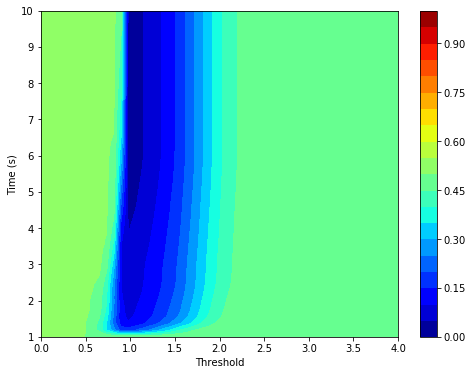

In [16]:
# this block is used to generate the precision graph with 0.5 * tp + 0.5 tn

precisions = []
for th in thresholds:
    for ti in range(len(times)):
        ptime = times[ti]
        if ptime < IGNORE_TIME / 1000:
            continue
        tp_rate = tps[th][ti] / ttot[th][ti]
        fp_rate = fps[th][ti] / ftot[th][ti]
        prec = 0.5 * tp_rate + 0.5 * (1 - fp_rate)
#         prec = tp_rate
        point = [th, ptime, prec]
        precisions.append(point)
precisions = np.array(precisions)
xd = precisions[:,0]
yd = precisions[:,1]
zd = precisions[:,2]

import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from matplotlib import cm


plt.clf()
fig = plt.figure(figsize=(8, 6))
# ax = fig.gca(projection='3d')
ax = fig.gca()
xi = np.linspace(np.min(xd), np.max(xd))
yi = np.linspace(np.min(yd), np.max(yd))
X, Y = np.meshgrid(xi, yi)
Z = mlab.griddata(xd, yd, zd, xi, yi, interp='linear')
# Z = precisions
# surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
# ax.set_zlim3d(np.min(Z), np.max(Z))
# fig.colorbar(surf)
# contour = ax.contour(xd, yd, zd, cmap=cm.jet)
contour = ax.contourf(X, Y, Z, np.linspace(0.0, 1.0, 21, endpoint=True), cmap=cm.jet)
# contour = ax.contourf(X, Y, precisions, np.linspace(0.0, 1.0, 21, endpoint=True), cmap=cm.jet)

fig.colorbar(contour)


ax.set_xlabel("Threshold")
ax.set_ylabel("Time (s)")
plt.show()

In [95]:
# this graph is used to generate the true positive graph

precisions = []
for th in thresholds:
    for ti in range(len(times)):
        ptime = times[ti]
        if ptime < IGNORE_TIME / 1000:
            continue
        tp_rate = tps[th][ti] / ttot[th][ti]
        prec = tp_rate
        point = [th, ptime, prec]
        precisions.append(point)
precisions = np.array(precisions)
xd = precisions[:,0]
yd = precisions[:,1]
zd = precisions[:,2]

import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from matplotlib import cm


plt.clf()
fig = plt.figure(figsize=(8, 6))
# ax = fig.gca(projection='3d')
ax = fig.gca()
xi = np.linspace(np.min(xd), np.max(xd))
yi = np.linspace(np.min(yd), np.max(yd))
X, Y = np.meshgrid(xi, yi)
Z = mlab.griddata(xd, yd, zd, xi, yi, interp='linear')
# Z = precisions
# surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
# ax.set_zlim3d(np.min(Z), np.max(Z))
# fig.colorbar(surf)
# contour = ax.contour(xd, yd, zd, cmap=cm.jet)
contour = ax.contourf(X, Y, Z, np.linspace(0.0, 1.0, 21, endpoint=True), cmap=cm.jet)
# contour = ax.contourf(X, Y, precisions, np.linspace(0.0, 1.0, 21, endpoint=True), cmap=cm.jet)

fig.colorbar(contour)


ax.set_xlabel("Threshold")
ax.set_ylabel("Time (s)")
plt.savefig("3d_tp_" + ACTIVITY + ".png", bbox_inches="tight")

/Users/jwpilly/anaconda/envs/magnetics/lib/python3.4/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [78]:
# this block is used to generate the false positives per hour 3d graph

precisions = []
for th in thresholds:
    for ti in range(len(times)):
        ptime = times[ti]
        if ptime < IGNORE_TIME / 1000:
            continue
        prec = (fps[th][ti] / ftot[th][ti]) / 6 * 3600
        point = [th, ptime, prec]
        precisions.append(point)
precisions = np.array(precisions)
xd = precisions[:,0]
yd = precisions[:,1]
zd = precisions[:,2]

import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from matplotlib import cm


plt.clf()
fig = plt.figure(figsize=(8, 6))
# ax = fig.gca(projection='3d')
ax = fig.gca()
xi = np.linspace(np.min(xd), np.max(xd))
yi = np.linspace(np.min(yd), np.max(yd))
X, Y = np.meshgrid(xi, yi)
Z = mlab.griddata(xd, yd, zd, xi, yi, interp='linear')
# Z = precisions
# surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
# ax.set_zlim3d(np.min(Z), np.max(Z))
# fig.colorbar(surf)
# contour = ax.contour(xd, yd, zd, cmap=cm.jet
from matplotlib.colors import LogNorm
lvls = np.logspace(0, np.log10(np.max(zd)), 26, endpoint=True)
contour = ax.contourf(X, Y, Z, levels=lvls, cmap=cm.jet, norm=LogNorm())
# contour = ax.contourf(X, Y, precisions, np.linspace(0.0, 1.0, 21, endpoint=True), cmap=cm.jet)

fig.colorbar(contour, ticks=lvls, format="%.1f")


ax.set_xlabel("Threshold")
ax.set_ylabel("Time (s)")
plt.savefig("3d_fp_" + ACTIVITY + ".png", bbox_inches="tight")

/Users/jwpilly/anaconda/envs/magnetics/lib/python3.4/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jwpilly/anaconda/envs/magnetics/lib/python3.4/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


In [79]:
# this graph is used to generate the false positive rate graph

precisions = []
for th in thresholds:
    for ti in range(len(times)):
        ptime = times[ti]
        if ptime < IGNORE_TIME / 1000:
            continue
        fp_rate = fps[th][ti] / ftot[th][ti]
        prec = fp_rate
        point = [th, ptime, prec]
        precisions.append(point)
precisions = np.array(precisions)
xd = precisions[:,0]
yd = precisions[:,1]
zd = precisions[:,2]

import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from matplotlib import cm


plt.clf()
fig = plt.figure(figsize=(8, 6))
# ax = fig.gca(projection='3d')
ax = fig.gca()
xi = np.linspace(np.min(xd), np.max(xd))
yi = np.linspace(np.min(yd), np.max(yd))
X, Y = np.meshgrid(xi, yi)
Z = mlab.griddata(xd, yd, zd, xi, yi, interp='linear')
# Z = precisions
# surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
# ax.set_zlim3d(np.min(Z), np.max(Z))
# fig.colorbar(surf)
# contour = ax.contour(xd, yd, zd, cmap=cm.jet)
contour = ax.contourf(X, Y, Z, np.linspace(0.0, 1.0, 21, endpoint=True), cmap=cm.jet)
# contour = ax.contourf(X, Y, precisions, np.linspace(0.0, 1.0, 21, endpoint=True), cmap=cm.jet)

fig.colorbar(contour)


ax.set_xlabel("Threshold")
ax.set_ylabel("Time (s)")
plt.savefig("3d_fpr_" + ACTIVITY + ".png", bbox_inches="tight")

/Users/jwpilly/anaconda/envs/magnetics/lib/python3.4/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
tp = syncRateFile("/Users/jwpilly/Research/Synchro/Study_v2/P1/synchro/t20170401112834_p1_sit/", True)
tp

In [ ]:
# correlateSyncAccelFile("/Users/jwpilly/Research/Synchro/Study_v2/P1/synchro/t20170401112834_p1_sit/")

In [ ]:
processSyncFile("/Users/jwpilly/Research/Synchro/Study_v2/P1/synchro/t20170401112834_p1_sit/")

In [ ]:
# this block iterates through all of the study data files to generate the sync times graph

from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
# baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
baseFilePath = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/sync1000/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), processSyncFile(efolderpaths[i])) for i in range(len(efolderpaths))]
    presults.append(efoldertimes)
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95]
# print(efoldertimes)
syncresults = []
for th in thresholds:
    presultsa = [[i[1][th] for i in t] for t in [sorted(r) for r in presults]]
    paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)
    syncresults.append(paverages)

In [ ]:
# this block iterates through all of the study data files to generate the sync times graph but for the noise files

from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), processSyncFile(efolderpaths[i], True)) for i in range(len(efolderpaths))]
    presults.append(efoldertimes)
thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95]
# print(efoldertimes)
syncresults = []
for th in thresholds:
    presultsa = [[i[1][th] for i in t] for t in [sorted(r) for r in presults]]
    paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)
    syncresults.append(paverages)

In [ ]:
# this block plots the results of the sync times graph. depending on which block was run before this one, the graph outputted is for sync data/noise data

%matplotlib inline
plt.clf()
x = thresholds
figure = plt.figure(figsize=(15, 7))
figure.add_subplot(121)
plt.title("Sync Times - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Threshold")
plt.ylim(0, 1)
plt.plot([syncresults[i][0] for i in range(len(x))],x, label="Sit Practice 1")
plt.plot([syncresults[i][1] for i in range(len(x))],x, label="Sit Practice 2")
plt.plot([syncresults[i][2] for i in range(len(x))],x, label="Sit Eval 1")
plt.plot([syncresults[i][3] for i in range(len(x))],x, label="Sit Eval 2")
plt.legend(loc="best")
figure.add_subplot(122)
plt.title("Sync Times - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Threshold")
plt.ylim(0, 1)
plt.plot([syncresults[i][4] for i in range(len(x))], x, label="Walk Practice 1")
plt.plot([syncresults[i][5] for i in range(len(x))], x, label="Walk Practice 2")
plt.plot([syncresults[i][6] for i in range(len(x))], x, label="Walk Eval 1")
plt.plot([syncresults[i][7] for i in range(len(x))], x, label="Walk Eval 2")
plt.legend(loc="best")
plt.savefig("synctimes.png", bbox_inches="tight")

In [ ]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph

from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
# baseFilePath = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/"
# baseFilePath = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncFile(efolderpaths[i])) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph

from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
# baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
IGNORE_TIME = 2000
sync750 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/sync750/"
sync1000 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/sync1000/"
sync1250 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/sync1250/"
noise750 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/noise750/"
noise1000 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/noise1000/"
noise1250 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/noise1250/"
sit1000 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/sync1000sitting/"
walk1000 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/sync1000walking/"
browse1000 = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/sync1000browsing/"
# presults = []
# for root, folders, files in os.walk(baseFilePath):
#     if not root.endswith("synchro") or "MACOSX" in root:
#         continue
#     sfolders = sorted(folders)    
#     efolders = [f for f in sfolders[:] if "prep" not in f]
#     efolderpaths = [root + "/" + f + "/" for f in efolders]
# #     print(efolderpaths)
#     efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncFile(efolderpaths[i])) for i in range(len(efolderpaths))]
# #     print(efoldertimes)
#     presults.append(efoldertimes)
#     print presults
# presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
# print reduce(lambda x, y : np.array(x) + np.array(y), presultsa)
# paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# majorLocator = MultipleLocator(1)
# majorFormatter = FormatStrFormatter('%d')
# minorLocator = MultipleLocator(5)


# s750 = correlateSyncFile(sync750)
s1000 = correlateSyncFile(sync1000)
# s1250 = correlateSyncFile(sync1250)
# n750 = correlateSyncFile(noise750)
# n1000 = correlateSyncFile(noise1000)
# n1250 = correlateSyncFile(noise1250)
# figure, ax = plt.subplots()
# (figsize=(22,15))

# fig, ax = plt.subplots()
# plt.plot(t, s)

# ax.xaxis.set_major_locator(majorLocator)
# ax.xaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
# ax.xaxis.set_minor_locator(minorLocator)

# plt.show()

# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# plt.x.set_major_locator(loc)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)                                                      

# major ticks every 20, minor ticks every 5                                      
major_ticks = np.arange(0, 20000, 1000)                                              
# minor_ticks = np.arange(0, 20000, 500)                                               

ax.set_xticks(major_ticks)                                                       
# ax.set_xticks(minor_ticks, minor=True)                                           
# ax.set_yticks(major_ticks)                                                       
# ax.set_yticks(minor_ticks, minor=True)                                           

# and a corresponding grid                                                       

# ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
# ax.grid(which='minor', alpha=0.2)                                                
# ax.grid(which='major', alpha=0.5) 



# plt.plot(s1250, '-r', label='Sync 0.8 Hz', linewidth=3)
# plt.plot(s1000, '-b', label='Sync 1 Hz', linewidth=3)
# plt.plot(s750, '-b', label='Sync 1.33 Hz', linewidth=3)
# plt.plot(n1250, '--r', label='Noise 0.8 Hz', linewidth=3)
plt.plot(n1000, '--g', label='Noise 1 Hz', linewidth=3)
# plt.plot(n750, '--b', label='Noise 1.33 Hz', linewidth=3)
legend = plt.legend(loc='lower right', shadow=False)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(3)  # the legend line width

plt.ylim(0,1)
plt.rcParams.update({'font.size': 9})
plt.savefig("/Users/gareyes/Downloads/figure.png", bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# majorLocator = MultipleLocator(1)
# majorFormatter = FormatStrFormatter('%d')
# minorLocator = MultipleLocator(5)


# s750 = correlateSyncFile(sync750)
s1000 = correlateSyncFile(sync1000)
# s1250 = correlateSyncFile(sync1250)
# n750 = correlateSyncFile(noise750)
# n1000 = correlateSyncFile(noise1000)
# n1250 = correlateSyncFile(noise1250)
# figure, ax = plt.subplots()
# (figsize=(22,15))

# fig, ax = plt.subplots()
# plt.plot(t, s)

# ax.xaxis.set_major_locator(majorLocator)
# ax.xaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
# ax.xaxis.set_minor_locator(minorLocator)

# plt.show()

# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# plt.x.set_major_locator(loc)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)                                                      

# major ticks every 20, minor ticks every 5                                      
# major_ticks = np.arange(0, 20000, 1000)                                              
# minor_ticks = np.arange(0, 20000, 500)                                               

# ax.set_xticks(major_ticks)                                                       
# ax.set_xticks(minor_ticks, minor=True)                                           
# ax.set_yticks(major_ticks)                                                       
# ax.set_yticks(minor_ticks, minor=True)                                           

# and a corresponding grid                                                       

# ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
# ax.grid(which='minor', alpha=0.2)                                                
# ax.grid(which='major', alpha=0.5) 



# plt.plot(s1250, '-r', label='Sync 0.8 Hz', linewidth=3)
# plt.plot(s1000, '-b', label='Sync 1 Hz', linewidth=3)
# plt.plot(s750, '-b', label='Sync 1.33 Hz', linewidth=3)
plt.plot(n1000, '--g', label='Reference Signal', linewidth=3)
plt.plot(n750, 'm', label='Feature Signal', linewidth=3)
plt.plot(n1250, 'g', label='Adj Reference Signal', linewidth=3)
# plt.plot(n750, '--b', label='Noise 1.33 Hz', linewidth=3)
legend = plt.legend(loc='lower right', shadow=False)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(3)  # the legend line width

plt.ylim(0,1)
plt.rcParams.update({'font.size': 9})
plt.savefig("/Users/gareyes/Downloads/figure.png", bbox_inches="tight")

In [ ]:
sit1000 = correlateSyncFile(sit1000)
walk1000 = correlateSyncFile(walk1000)
browse1000 = correlateSyncFile(browse1000)
plt.plot(browse1000, '-r')
plt.plot(sit1000, '-g')
plt.plot(walk1000, '-b')
plt.show()

In [ ]:
# this block iterates through the study data and calculates the data needed for the magnitude over time graph

from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), magSyncFile(efolderpaths[i])) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block generates the graph for the magnitude over time data. 

%matplotlib inline
plt.clf()
x = corr_times / 1000
figure = plt.figure(figsize=(15, 7))
figure.add_subplot(121)
plt.title("Magnitude Over Time - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
# plt.ylim(0, 1)
plt.plot(x, [paverages[0][i] for i in range(len(x))], label="Sit Practice 1")
plt.plot(x, [paverages[1][i] for i in range(len(x))], label="Sit Practice 2")
plt.plot(x, [paverages[2][i] for i in range(len(x))], label="Sit Eval 1")
plt.plot(x, [paverages[3][i] for i in range(len(x))], label="Sit Eval 2")
plt.legend(loc="best")
figure.add_subplot(122)
plt.title("Magnitude Over Time - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
# plt.ylim(0, 1)
plt.plot(x, [paverages[4][i] for i in range(len(x))], label="Walk Practice 1")
plt.plot(x, [paverages[5][i] for i in range(len(x))], label="Walk Practice 2")
plt.plot(x, [paverages[6][i] for i in range(len(x))], label="Walk Eval 1")
plt.plot(x, [paverages[7][i] for i in range(len(x))], label="Walk Eval 2")
plt.legend(loc="best")
plt.savefig("magnitude_over_time.png", bbox_inches="tight")

In [ ]:
# this block iterates through the study data and calculates the data needed for the magnitude over time graph but for noise


from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), magSyncFile(efolderpaths[i], True)) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block generates the graph for the magnitude over time data but for noise


%matplotlib inline
plt.clf()
x = corr_times / 1000
figure = plt.figure(figsize=(15, 7))
figure.add_subplot(121)
plt.title("Magnitude Over Time - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
# plt.ylim(0, 1)
plt.plot(x, [paverages[0][i] for i in range(len(x))], label="Sit Practice 1")
plt.plot(x, [paverages[1][i] for i in range(len(x))], label="Sit Practice 2")
plt.plot(x, [paverages[2][i] for i in range(len(x))], label="Sit Eval 1")
plt.plot(x, [paverages[3][i] for i in range(len(x))], label="Sit Eval 2")
plt.legend(loc="best")
figure.add_subplot(122)
plt.title("Magnitude Over Time - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
# plt.ylim(0, 1)
plt.plot(x, [paverages[4][i] for i in range(len(x))], label="Walk Practice 1")
plt.plot(x, [paverages[5][i] for i in range(len(x))], label="Walk Practice 2")
plt.plot(x, [paverages[6][i] for i in range(len(x))], label="Walk Eval 1")
plt.plot(x, [paverages[7][i] for i in range(len(x))], label="Walk Eval 2")
plt.legend(loc="best")
plt.savefig("magnitude_over_time_noise.png", bbox_inches="tight")

In [ ]:
magSyncFile("/Users/jwpilly/Research/Synchro/Study_v2/P1/synchro/t20170401112834_p1_sit/")

In [ ]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph

from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
# baseFilePath = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/Study_v1/Flat/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncFile(efolderpaths[i])) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph but for noise


from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncFile(efolderpaths[i], True)) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block generates the graph for the correlation over time graphs depending on which block was run before this, it is for sync/noise

%matplotlib inline
plt.clf()
x = corr_times / 1000
figure = plt.figure(figsize=(15, 7))
figure.add_subplot(121)
plt.title("Correlation Over Time - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
plt.ylim(0, 1)
plt.plot(x, [paverages[0][i] for i in range(len(x))], label="Sit Practice 1")
plt.plot(x, [paverages[1][i] for i in range(len(x))], label="Sit Practice 2")
plt.plot(x, [paverages[2][i] for i in range(len(x))], label="Sit Eval 1")
plt.plot(x, [paverages[3][i] for i in range(len(x))], label="Sit Eval 2")
plt.legend(loc="best")
figure.add_subplot(122)
plt.title("Correlation Over Time - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
plt.ylim(0, 1)
plt.plot(x, [paverages[4][i] for i in range(len(x))], label="Walk Practice 1")
plt.plot(x, [paverages[5][i] for i in range(len(x))], label="Walk Practice 2")
plt.plot(x, [paverages[6][i] for i in range(len(x))], label="Walk Eval 1")
plt.plot(x, [paverages[7][i] for i in range(len(x))], label="Walk Eval 2")
plt.legend(loc="best")
plt.savefig("correlation_over_time.png", bbox_inches="tight")

In [8]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph with accel



from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
# baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
baseFilePath = "/media/jwpilly/PillowDisk/Research/Synchro/figuredata/figure12/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncAccelFile(efolderpaths[i])) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph with accel but for noise


from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncAccelFile(efolderpaths[i], True)) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block generates the graph for the correlation over time graphs with accel. depending on which block was run before this, it is for sync/noise

%matplotlib inline
plt.clf()
plt.figure(figsize=(8,7))
x = corr_times / 1000
# figure = plt.figure(figsize=(15, 7))
# figure.add_subplot(121)
plt.title("Correlation Over Time - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
plt.ylim(-1, 1)
plt.plot(x, [paverages[0][0][i] for i in range(len(x))], label="Sit Practice 1")
plt.plot(x, [paverages[1][0][i] for i in range(len(x))], label="Sit Practice 2")
plt.plot(x, [paverages[2][0][i] for i in range(len(x))], label="Sit Eval 1")
plt.plot(x, [paverages[3][0][i] for i in range(len(x))], label="Sit Eval 2")
plt.plot(x, np.mean([paverages[pi][1][0] for pi in range(len(paverages) // 2)], axis=0) / np.ptp([paverages[pi][1][0] for pi in range(len(paverages))]) / 2, label="Accel x")
plt.plot(x, np.mean([paverages[pi][1][1] for pi in range(len(paverages) // 2)], axis=0) / np.ptp([paverages[pi][1][1] for pi in range(len(paverages))]) / 2, label="Accel y")
plt.plot(x, np.mean([paverages[pi][1][2] for pi in range(len(paverages) // 2)], axis=0) / np.ptp([paverages[pi][1][2] for pi in range(len(paverages))]) / 2, label="Accel z")
plt.legend(loc="best")
plt.savefig("correlation_over_time_accel_1.png", bbox_inches="tight")
# figure.add_subplot(122)
plt.clf()
plt.figure(figsize=(8,7))
plt.title("Correlation Over Time - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
plt.ylim(-1, 1)
plt.plot(x, [paverages[4][0][i] for i in range(len(x))], label="Walk Practice 1")
plt.plot(x, [paverages[5][0][i] for i in range(len(x))], label="Walk Practice 2")
plt.plot(x, [paverages[6][0][i] for i in range(len(x))], label="Walk Eval 1")
plt.plot(x, [paverages[7][0][i] for i in range(len(x))], label="Walk Eval 2")
plt.plot(x, np.mean([paverages[pi][1][0] for pi in range(len(paverages) // 2 + 4)], axis=0) / np.ptp([paverages[pi][1][0] for pi in range(len(paverages))]) / 2, label="Accel x")
plt.plot(x, np.mean([paverages[pi][1][1] for pi in range(len(paverages) // 2 + 4)], axis=0) / np.ptp([paverages[pi][1][1] for pi in range(len(paverages))]) / 2, label="Accel y")
plt.plot(x, np.mean([paverages[pi][1][2] for pi in range(len(paverages) // 2 + 4)], axis=0) / np.ptp([paverages[pi][1][2] for pi in range(len(paverages))]) / 2, label="Accel z")
plt.legend(loc="best")
plt.savefig("correlation_over_time_accel_2.png", bbox_inches="tight")

In [ ]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph with accel



from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncDeltaFile(efolderpaths[i], True)) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block generates the graph for the correlation over time graphs with accel. depending on which block was run before this, it is for sync/noise

%matplotlib inline
plt.clf()
plt.figure(figsize=(8,7))
x = corr_times / 1000
# figure = plt.figure(figsize=(15, 7))
# figure.add_subplot(121)
plt.title("Correlation Over Time - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
# plt.ylim(-1, 1)
plt.plot(x, [paverages[0][0][i] for i in range(len(x))], label="Sit Practice 1")
plt.plot(x, [paverages[1][0][i] for i in range(len(x))], label="Sit Practice 2")
plt.plot(x, [paverages[2][0][i] for i in range(len(x))], label="Sit Eval 1")
plt.plot(x, [paverages[3][0][i] for i in range(len(x))], label="Sit Eval 2")
plt.plot(x, np.mean([paverages[pi][1] for pi in range(len(paverages) // 2)], axis=0), label="Deltas")
plt.legend(loc="best")
plt.savefig("correlation_over_time_delta_1.png", bbox_inches="tight")
# figure.add_subplot(122)
plt.clf()
plt.figure(figsize=(8,7))
plt.title("Correlation Over Time - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
# plt.ylim(-1, 1)
plt.plot(x, [paverages[4][0][i] for i in range(len(x))], label="Walk Practice 1")
plt.plot(x, [paverages[5][0][i] for i in range(len(x))], label="Walk Practice 2")
plt.plot(x, [paverages[6][0][i] for i in range(len(x))], label="Walk Eval 1")
plt.plot(x, [paverages[7][0][i] for i in range(len(x))], label="Walk Eval 2")
plt.plot(x, np.mean([paverages[pi][1] for pi in range(len(paverages) // 2 + 4)], axis=0), label="Deltas")
plt.legend(loc="best")
plt.savefig("correlation_over_time_delta_2.png", bbox_inches="tight")

In [ ]:
# this block iterates through the study data and calculates the data needed for the correlation over time graph with accel



from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), correlateSyncMagFile(efolderpaths[i], True)) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)

In [ ]:
# this block generates the graph for the correlation over time graphs with accel. depending on which block was run before this, it is for sync/noise

%matplotlib inline
plt.clf()
plt.figure(figsize=(8,7))
x = corr_times / 1000
# figure = plt.figure(figsize=(15, 7))
# figure.add_subplot(121)
plt.title("Correlation Over Time - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
# plt.ylim(-1, 1)
plt.plot(x, [paverages[0][0][i] for i in range(len(x))], label="Sit Practice 1")
plt.plot(x, [paverages[1][0][i] for i in range(len(x))], label="Sit Practice 2")
plt.plot(x, [paverages[2][0][i] for i in range(len(x))], label="Sit Eval 1")
plt.plot(x, [paverages[3][0][i] for i in range(len(x))], label="Sit Eval 2")
plt.plot(x, np.mean([paverages[pi][1] for pi in range(len(paverages) // 2)], axis=0), label="Mags")
plt.legend(loc="best")
plt.savefig("correlation_over_time_mag_1.png", bbox_inches="tight")
# figure.add_subplot(122)
plt.clf()
plt.figure(figsize=(8,7))
plt.title("Correlation Over Time - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
# plt.ylim(-1, 1)
plt.plot(x, [paverages[4][0][i] for i in range(len(x))], label="Walk Practice 1")
plt.plot(x, [paverages[5][0][i] for i in range(len(x))], label="Walk Practice 2")
plt.plot(x, [paverages[6][0][i] for i in range(len(x))], label="Walk Eval 1")
plt.plot(x, [paverages[7][0][i] for i in range(len(x))], label="Walk Eval 2")
plt.plot(x, np.mean([paverages[pi][1] for pi in range(len(paverages) // 2 + 4)], axis=0), label="Mags")
plt.legend(loc="best")
plt.savefig("correlation_over_time_mag_2.png", bbox_inches="tight")

In [ ]:
# this block generates the graph for the correlation over time graphs with accel. depending on which block was run before this, it is for sync/noise

%matplotlib inline
plt.clf()
plt.figure(figsize=(8,7))
x = corr_times / 1000
# figure = plt.figure(figsize=(15, 7))
# figure.add_subplot(121)
plt.title("Correlation Over Time - Sitting")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
# plt.ylim(-1, 1)
plt.plot(x, [paverages[0][0][i] for i in range(len(x))], label="Sit Practice 1")
plt.plot(x, [paverages[1][0][i] for i in range(len(x))], label="Sit Practice 2")
plt.plot(x, [paverages[2][0][i] for i in range(len(x))], label="Sit Eval 1")
plt.plot(x, [paverages[3][0][i] for i in range(len(x))], label="Sit Eval 2")
plt.plot(x, np.mean([paverages[pi][1][0] for pi in range(len(paverages) // 2)], axis=0), label="Accel x")
plt.plot(x, np.mean([paverages[pi][1][1] for pi in range(len(paverages) // 2)], axis=0), label="Accel y")
plt.plot(x, np.mean([paverages[pi][1][2] for pi in range(len(paverages) // 2)], axis=0), label="Accel z")
plt.legend(loc="best")
plt.savefig("correlation_over_time_accel_1.png", bbox_inches="tight")
# figure.add_subplot(122)
plt.clf()
plt.figure(figsize=(8,7))
plt.title("Correlation Over Time - Walking")
plt.xlabel("Time (s)")
plt.ylabel("Correlation")
# plt.ylim(-1, 1)
plt.plot(x, [paverages[4][0][i] for i in range(len(x))], label="Walk Practice 1")
plt.plot(x, [paverages[5][0][i] for i in range(len(x))], label="Walk Practice 2")
plt.plot(x, [paverages[6][0][i] for i in range(len(x))], label="Walk Eval 1")
plt.plot(x, [paverages[7][0][i] for i in range(len(x))], label="Walk Eval 2")
plt.plot(x, np.mean([paverages[pi][1][0] for pi in range(len(paverages) // 2 + 4)], axis=0), label="Accel x")
plt.plot(x, np.mean([paverages[pi][1][1] for pi in range(len(paverages) // 2 + 4)], axis=0), label="Accel y")
plt.plot(x, np.mean([paverages[pi][1][2] for pi in range(len(paverages) // 2 + 4)], axis=0), label="Accel z")
plt.legend(loc="best")
plt.savefig("correlation_over_time_accel_2.png", bbox_inches="tight")

In [ ]:
from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
presultsn = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), generateMagDist(efolderpaths[i])) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
    efoldertimesn = [(efolderpaths[i].split("_")[-1][:-1] + str(i), generateMagDist(efolderpaths[i], True)) for i in range(len(efolderpaths))]
    presultsn.append(efoldertimesn)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
presultsaname = [[i[0] for i in t] for t in [sorted(r) for r in presults]]
pmags_sit = reduce(lambda x, y : x + y, [[presultsa[i][li] for li in range(len(presultsa[i])) if "sit" in presultsaname[i][li]] for i in range(len(presults))])
pmags_walk = reduce(lambda x, y : x + y, [[presultsa[i][li] for li in range(len(presultsa[i])) if "walk" in presultsaname[i][li]] for i in range(len(presults))])



presultsan = [[i[1] for i in t] for t in [sorted(r) for r in presultsn]]
presultsanname = [[i[0] for i in t] for t in [sorted(r) for r in presultsn]]
pmags_sitn = reduce(lambda x, y : x + y, [[presultsan[i][li] for li in range(len(presultsan[i])) if "sit" in presultsanname[i][li]] for i in range(len(presultsn))])
pmags_walkn = reduce(lambda x, y : x + y, [[presultsan[i][li] for li in range(len(presultsan[i])) if "walk" in presultsanname[i][li]] for i in range(len(presultsn))])

# Calculate overlap between the two KDEs.
def y_pts(ker_a, ker_b, pt):
    y_pt = min(ker_a(pt), ker_b(pt))
    return y_pt

In [ ]:
print(presultsaname)

In [ ]:
from scipy import stats

flatten = lambda l: [item for sublist in l for item in sublist]

sm = stats.gaussian_kde(flatten(pmags_sit))
smn = stats.gaussian_kde(flatten(pmags_sitn))
wm = stats.gaussian_kde(flatten(pmags_walk))
wmn = stats.gaussian_kde(flatten(pmags_walkn))

xs = np.linspace(-20, 50, 201)

plt.clf()
plt.plot(xs, sm(xs))
plt.plot(xs, smn(xs))
plt.show()

plt.clf()
plt.plot(xs, wm(xs))
plt.plot(xs, wmn(xs))
plt.show()


In [ ]:
from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
presultsn = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), generateDeltaDist(efolderpaths[i])) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
    efoldertimesn = [(efolderpaths[i].split("_")[-1][:-1] + str(i), generateDeltaDist(efolderpaths[i], True)) for i in range(len(efolderpaths))]
    presultsn.append(efoldertimesn)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
presultsaname = [[i[0] for i in t] for t in [sorted(r) for r in presults]]
pmags_sit = reduce(lambda x, y : x + y, [[presultsa[i][li] for li in range(len(presultsa[i])) if "sit" in presultsaname[i][li]] for i in range(len(presults))])
pmags_walk = reduce(lambda x, y : x + y, [[presultsa[i][li] for li in range(len(presultsa[i])) if "walk" in presultsaname[i][li]] for i in range(len(presults))])



presultsan = [[i[1] for i in t] for t in [sorted(r) for r in presultsn]]
presultsanname = [[i[0] for i in t] for t in [sorted(r) for r in presultsn]]
pmags_sitn = reduce(lambda x, y : x + y, [[presultsan[i][li] for li in range(len(presultsan[i])) if "sit" in presultsanname[i][li]] for i in range(len(presultsn))])
pmags_walkn = reduce(lambda x, y : x + y, [[presultsan[i][li] for li in range(len(presultsan[i])) if "walk" in presultsanname[i][li]] for i in range(len(presultsn))])

# Calculate overlap between the two KDEs.
def y_pts(ker_a, ker_b, pt):
    y_pt = min(ker_a(pt), ker_b(pt))
    return y_pt

In [ ]:
from scipy import stats

flatten = lambda l: [item for sublist in l for item in sublist]

sm = stats.gaussian_kde(flatten(pmags_sit))
smn = stats.gaussian_kde(flatten(pmags_sitn))
wm = stats.gaussian_kde(flatten(pmags_walk))
wmn = stats.gaussian_kde(flatten(pmags_walkn))

xs = np.linspace(-20, 50, 201)

plt.clf()
plt.plot(xs, sm(xs))
plt.plot(xs, smn(xs))
plt.show()

plt.clf()
plt.plot(xs, wm(xs))
plt.plot(xs, wmn(xs))
plt.show()


In [ ]:
from functools import reduce

# baseFilePath = "/Users/jwpilly/Documents/Research/Synchro/Study_v2/"
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
presultsn = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
#     print(efolderpaths)
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), generateAccelDist(efolderpaths[i])) for i in range(len(efolderpaths))]
#     print(efoldertimes)
    presults.append(efoldertimes)
    efoldertimesn = [(efolderpaths[i].split("_")[-1][:-1] + str(i), generateAccelDist(efolderpaths[i], True)) for i in range(len(efolderpaths))]
    presultsn.append(efoldertimesn)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
presultsaname = [[i[0] for i in t] for t in [sorted(r) for r in presults]]
paccels_sit = reduce(lambda x, y : [x[d] + y[d] for d in range(3)], [[presultsa[i][li] for li in range(len(presultsa[i])) if "sit" in presultsaname[i][li]] for i in range(len(presults))])
paccels_walk = reduce(lambda x, y : [x[d] + y[d] for d in range(3)], [[presultsa[i][li] for li in range(len(presultsa[i])) if "walk" in presultsaname[i][li]] for i in range(len(presults))])



presultsan = [[i[1] for i in t] for t in [sorted(r) for r in presultsn]]
presultsanname = [[i[0] for i in t] for t in [sorted(r) for r in presultsn]]
paccels_sitn = reduce(lambda x, y : [x[d] + y[d] for d in range(3)], [[presultsan[i][li] for li in range(len(presultsan[i])) if "sit" in presultsanname[i][li]] for i in range(len(presultsn))])
paccels_walkn = reduce(lambda x, y : [x[d] + y[d] for d in range(3)], [[presultsan[i][li] for li in range(len(presultsan[i])) if "walk" in presultsanname[i][li]] for i in range(len(presultsn))])

# Calculate overlap between the two KDEs.
def y_pts(ker_a, ker_b, pt):
    y_pt = min(ker_a(pt), ker_b(pt))
    return y_pt
# Store overlap value.
# overlap = quad(lambda x : y_pts(gd[1], gdn[1], x), -np.inf, np.inf)
# print(overlap)

In [ ]:
presults[0]

In [ ]:
[[i[0] for i in t] for t in [sorted(r) for r in presults]]

In [ ]:
sx = np.mean(np.array((flatten(paccels_sit[0]))))
sy = np.mean(np.array((flatten(paccels_sit[1]))))
sz = np.mean(np.array((flatten(paccels_sit[2]))))

wx = np.mean(np.array((flatten(paccels_walk[0]))))
wy = np.mean(np.array((flatten(paccels_walk[1]))))
wz = np.mean(np.array((flatten(paccels_walk[2]))))

sxn = np.mean(np.array((flatten(paccels_sitn[0]))))
syn = np.mean(np.array((flatten(paccels_sitn[1]))))
szn = np.mean(np.array((flatten(paccels_sitn[2]))))

wxn = np.mean(np.array((flatten(paccels_walkn[0]))))
wyn = np.mean(np.array((flatten(paccels_walkn[1]))))
wzn = np.mean(np.array((flatten(paccels_walkn[2]))))
              
print(sx, ",", sy, ",", sz)
print(wx, ",", wy, ",", wz)

print(sxn, ",", syn, ",", szn)
print(wxn, ",", wyn, ",", wzn)

In [ ]:
from scipy import stats

flatten = lambda l: [item for sublist in l for item in sublist]

sx = stats.gaussian_kde(flatten(paccels_sit[0]))
sy = stats.gaussian_kde(flatten(paccels_sit[1]))
sz = stats.gaussian_kde(flatten(paccels_sit[2]))

wx = stats.gaussian_kde(flatten(paccels_walk[0]))
wy = stats.gaussian_kde(flatten(paccels_walk[1]))
wz = stats.gaussian_kde(flatten(paccels_walk[2]))

sxn = stats.gaussian_kde(flatten(paccels_sitn[0]))
syn = stats.gaussian_kde(flatten(paccels_sitn[1]))
szn = stats.gaussian_kde(flatten(paccels_sitn[2]))

wxn = stats.gaussian_kde(flatten(paccels_walkn[0]))
wyn = stats.gaussian_kde(flatten(paccels_walkn[1]))
wzn = stats.gaussian_kde(flatten(paccels_walkn[2]))

xs = np.linspace(-20, 20, 201)

plt.clf()
plt.plot(xs, sx(xs))
plt.plot(xs, sxn(xs))
plt.show()

plt.clf()
plt.plot(xs, sy(xs))
plt.plot(xs, syn(xs))
plt.show()

plt.clf()
plt.plot(xs, sz(xs))
plt.plot(xs, szn(xs))
plt.show()

plt.clf()
plt.plot(xs, wx(xs))
plt.plot(xs, wxn(xs))
plt.show()

plt.clf()
plt.plot(xs, wy(xs))
plt.plot(xs, wyn(xs))
plt.show()

plt.clf()
plt.plot(xs, wz(xs))
plt.plot(xs, wzn(xs))
plt.show()

In [ ]:
graphPath = "/Users/jwpilly/Research/Synchro/Study_v2/P6/synchro/t20170403152443_p6_walk/"

ssg = generateAccelDist(graphPath)
ssgn = generateAccelDist(graphPath, True)
ssx = stats.gaussian_kde(ssg[0])
ssy = stats.gaussian_kde(ssg[1])
ssz = stats.gaussian_kde(ssg[2])
ssxn = stats.gaussian_kde(ssgn[0])
ssyn = stats.gaussian_kde(ssgn[1])
sszn = stats.gaussian_kde(ssgn[2])
plt.clf()
plt.plot(xs, ssx(xs), color="r")
plt.plot(xs, ssxn(xs), color="g")
plt.show()
plt.clf()
plt.plot(xs, ssy(xs), color="r")
plt.plot(xs, ssyn(xs), color="g")
plt.show()
plt.clf()
plt.plot(xs, ssz(xs), color="r")
plt.plot(xs, sszn(xs), color="g")
plt.show()

In [ ]:
baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("synchro") or "MACOSX" in root:
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
    efoldertimes = [segmentNoiseFile(efolderpaths[i]) for i in range(len(efolderpaths))]

In [ ]:
from functools import reduce

baseFilePath = "/Users/jwpilly/Research/Synchro/Study_v2/"
presults = []
for root, folders, files in os.walk(baseFilePath):
    if not root.endswith("swipe"):
        continue
    sfolders = sorted(folders, key=lambda x : int(x.split("_")[0].replace("t", "")))
    efolders = [f for f in sfolders[:] if "prep" not in f]
    efolderpaths = [root + "/" + f + "/" for f in efolders]
    efoldertimes = [(efolderpaths[i].split("_")[-1][:-1] + str(i), processSwipeFile(efolderpaths[i])) for i in range(len(efolderpaths))]
    presults.append(efoldertimes)
presultsa = [[i[1] for i in t] for t in [sorted(r) for r in presults]]
paverages = reduce(lambda x, y : np.array(x) + np.array(y), presultsa) / len(presultsa)
print(paverages)
swipe_sit = np.mean([paverages[i] for i in range(4)])
swipe_walk = np.mean([paverages[i + 4] for i in range(4)])
swipe_times = paverages

In [ ]:
%matplotlib inline
plt.clf()
fig = plt.figure(figsize=(6, 4))
objects = ('Practice 1', 'Practice 2', 'Eval 1', 'Eval 2')
y_pos = np.arange(len(objects))
performance = paverages
# plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.plot(y_pos, [paverages[i] for i in range(4)], label="Sit")
plt.plot(y_pos, [paverages[i + 4] for i in range(4)], label="Walk")
plt.xticks(y_pos, objects)
plt.ylim((1.5,2.5))
plt.ylabel('Time (s)')
plt.title('Swipe Times')
plt.legend(loc="best")
plt.savefig("swipetimes.pdf")

In [ ]:
print(syncresults)
print(thresholds)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.clf()
labels = ["Swipe", "0.6", "0.7", "0.8", "0.9"]
width= 0.3
ind = np.arange(len(labels))
plt.bar(ind, [np.mean(swipe_times[:4]), np.mean(syncresults[2][:4]), np.mean(syncresults[4][:4]), np.mean(syncresults[6][:4]), np.mean(syncresults[8][:4])], width=width, label="Sit")
plt.bar(ind + width * 1.2, [np.mean(swipe_times[4:]), np.mean(syncresults[2][4:]), np.mean(syncresults[4][4:]), np.mean(syncresults[6][4:]), np.mean(syncresults[8][4:])], width=width, label="Walk")
plt.xticks( 0.1 + ind + width / 1.5, labels)
plt.xlabel("Threshold")
plt.ylabel("Sync Time (s)")
plt.legend(loc="best")
plt.savefig("overall_performance_bar.png", bbox_inches='tight')
# plt.show()

In [ ]:
!pip install -U matplotlib

In [ ]:
l = [0,1,2,2,4,4,56]
# [x+1 for x in l if x >= 45]
list2 = [ind for ind, x in enumerate(l) if x > 45]
print(list2)

In [ ]:
list2 = [x for ind, x in enumerate(list1) if 4 > ind > 0]

In [ ]:
windowDataSet = loadWindows()
vizWindows(windowDataSet)

In [ ]:
liveCorrDataSet = loadLiveCorrData()

In [ ]:
print(x for x in liveCorrDataSet[liveCorrDataSet.keys()[0]].direction if x != null)

In [ ]:
# Generate all reference graph
syncList = []
for f in windowDataSet.keys():        
    syncList.append('_'.join(f.split("_")[0:3]))
    syncList = sorted(set(syncList))

for i, element in enumerate(syncList):    
    
    # Make folders
    paths = [figurePath + "reference/"]
    for path in paths:
        if not os.path.exists(path):
            os.makedirs(path)

    figureFile = figurePath + "reference/" + element + "_summary.pdf"
    fig, axs = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_size_inches(15,15)
    for key in windowDataSet:
        if syncList[i] in key:
            df = windowDataSet[key]
            axs[0].plot(df.timestamp, df.feature, '-r', label="feature")
            axs[0].plot(df.timestamp, df.reference, '-b', label="reference")
            axs[1].plot(df.timestamp, df.feature, '-g', label="feature")
            axs[1].plot(df.timestamp, df.adjusted, '-b', label="adjusted")    
    axs[0].set_title("feat-ref:")
    axs[1].set_title("feat-adjref:")
    fig.savefig(figureFile)
    plt.close()
print("done generating all references")

In [ ]:
# Initialize sets
avg={}
leftPeaksSet={}
rightPeaksSet={}
angles={}

for key in rawDataSet:
    
    print(key)

    # Initialize data structures
    anglesList=[]
    avgList=[]
    left=[]
    leftPeaks = []
    rightPeaks = []

    # Get data
    df = subsampleDataSet[key]
    left = leftTicksSet[key]
    right = rightTicksSet[key]
    
    
    # Per window based on number of left peaks
    for i in range(1, len(left)):

        # Get slice of window from all data
        dataFrame = df[df['timestamp'].between(left[i-1], left[i], inclusive=True)]

        # Calculate average time and vector across window
        avgTime = np.sum(dataFrame[0:].timestamp)/len(dataFrame)
        avgVector = [np.sum(dataFrame[0:].x)/len(dataFrame), np.sum(dataFrame[0:].y)/len(dataFrame), np.sum(dataFrame[0:].z)/len(dataFrame)]
        averageVector=np.array(avgVector)

        windowAngles = []
        windowTimes=[]
        
        # Per point in window
        for j in range(0,len(dataFrame)):
            
            # Save timestamps per window
            windowTimes.append(dataFrame.timestamp.values[j])

            # Save angle per window 
            currentVector = []
            currentVector = np.array([dataFrame.x.values[j], dataFrame.y.values[j], dataFrame.z.values[j]])            
            angle = angle_between(currentVector, averageVector) 
            windowAngles.append(angle)
            
            # Construct list with timestamp and angle
            anglesList.append(np.array([dataFrame.timestamp.values[j], angle]))                         

        angle1index = windowAngles.index(np.max(windowAngles[0:5]))
        angle2index = windowAngles.index(np.max(windowAngles[5:10]))
        angle1vector = np.array([dataFrame.x.values[angle1index], dataFrame.y.values[angle1index], dataFrame.z.values[angle1index]])            
        angle2vector = np.array([dataFrame.x.values[angle2index], dataFrame.y.values[angle2index], dataFrame.z.values[angle2index]])            
        angle1time = windowTimes[windowAngles.index(np.max(windowAngles[0:5]))]
        angle2time = windowTimes[windowAngles.index(np.max(windowAngles[5:10]))]
  
        meanmag = get_magnitude(averageVector)
        angle1mag = get_magnitude(angle1vector)
        angle2mag = get_magnitude(angle2vector)
        
#         print(angle1mag, meanmag, angle2mag)
        
        if angle1mag > meanmag:
            print("right")
        elif angle2mag > meanmag:
            print("left")

        left1time = left[i-1]
        righttime = right[i-1]
        left2time = left[i]
        
#         print(left1time < righttime < left2time)

        A = np.square(left1time - angle1time)
        B = np.square(righttime - angle2time)
        C = np.square(left2time - angle2time) 
        D = np.square(righttime - angle1time)
        
        score1 = np.sqrt(A + C)
        score2 = np.sqrt(B + D)
        
#         print(score1, score2)
        
#         if(score1 < score2):
#             print("left")
#         else:
#             print("right")
        
#         print("----------")

#         print(score1, score2)
            
#         previousLefts = []
#         for i in range(0, len(left)):
#             if left[i] < firstTimestamp:
#                 previousLefts.append(left[i])
        
#         previousRights = []
#         for i in range(0, len(right)):
#             if right[i] < secondTimestamp:
#                 previousRights.append(right[i])        
        
#         leftIndicator = np.min(np.abs(previousLefts - firstTimestamp))
#         rightIndicator = np.min(np.abs(previousRights - secondTimestamp))        
        
#         if leftIndicator < rightIndicator:
# #             windowLabels.append("left")
#             print("left")
#         else:
# #             windowLabels.append("right")
#             print("right")

        # Find left and right peak using max angle difference
        leftPeaks.append(np.array([angle1time]))
        rightPeaks.append(np.array([angle2time]))
#         leftPeaks.append(np.array([windowTimes[windowAngles.index(np.sort(windowAngles[0:5])[-3:][0])]]))
#         rightPeaks.append(np.array([windowTimes[windowAngles.index(np.sort(windowAngles[5:10])[-3:][0])]]))        

        # Save average time and vector
        tempList=[]
        tempList.append(avgTime)
        tempList.extend(avgVector)
        avgList.append(np.array(tempList))    

    # Save sets
    angles[key] = anglesList
    avg[key] = avgList
    leftPeaksSet[key] = leftPeaks
    rightPeaksSet[key] = rightPeaks    

In [ ]:
# Get mean feature
for key in rawDataSet:
#     fig = plt.figure()
    df = subsampleDataSet[key]
    lefts = leftTicksSet[key]
    rights = rightTicksSet[key]
    avgs = avg[key]
    angleVal = angles[key]
    leftPeak = leftPeaksSet[key]
    rightPeak = rightPeaksSet[key]
    
    fig, axs = plt.subplots(2, 1, sharex=True, sharey=False)
    
    axs[0].plot(df.timestamp, df.x, '-r')
    axs[0].plot(df.timestamp, df.y, '-g')
    axs[0].plot(df.timestamp, df.z, '-b')
    
    for i in lefts:
        axs[0].axvline(i, color='b')
        axs[1].axvline(i, color='b')
    for i in rights:
        axs[0].axvline(i, color='r')
        axs[1].axvline(i, color='r')        
    
    for i in leftPeak:
        axs[0].axvline(i, color='g')
        axs[1].axvline(i, color='g')

    for i in rightPeak:
        axs[0].axvline(i, color='k')
        axs[1].axvline(i, color='k')
    
    for i in range(0, len(avgs)):
        axs[0].scatter(avgs[i][0], avgs[i][1])
        axs[0].scatter(avgs[i][0], avgs[i][2])
        axs[0].scatter(avgs[i][0], avgs[i][3])
        
    for i in range(0, len(angleVal)):
        axs[1].scatter(angleVal[i][0], angleVal[i][1])
#         axs[1].text(angleVal[i][0], math.degrees(angleVal[i][1])/10, str(angleVal[i][2]))
        
    plt.show()   

In [ ]:
# Initialize sets
avg={}
leftPeaksSet={}
rightPeaksSet={}
angles={}

for key in rawDataSet:

    # Initialize data structures
    anglesList=[]
    avgList=[]
    left=[]
    leftPeaks = []
    rightPeaks = []

    # Get data
    df = subsampleDataSet[key]
    left = leftTicksSet[key]
    right = rightTicksSet[key]
    
    # Per window based on number of left peaks
    for i in range(1, len(left)):

        # Get slice of window from all data
        dataFrame = df[df['timestamp'].between(left[i-1], left[i], inclusive=True)]

        # Calculate average time and vector across window
        avgTime = np.sum(dataFrame[0:].timestamp)/len(dataFrame)
        avgVector = [np.sum(dataFrame[0:].x)/len(dataFrame), np.sum(dataFrame[0:].y)/len(dataFrame), np.sum(dataFrame[0:].z)/len(dataFrame)]
        averageVector=np.array(avgVector)

        windowAngles = []
        windowTimes=[]
        
        # Per point in window
        for i in range(0,len(dataFrame)):
            
            # Save timestamps per window
            windowTimes.append(dataFrame.timestamp.values[i])

            # Save angle per window 
            currentVector = []
            currentVector = np.array([dataFrame.x.values[i], dataFrame.y.values[i], dataFrame.z.values[i]])            
            angle = angle_between(currentVector, averageVector) 
            windowAngles.append(angle)
            
            # Construct list with timestamp and angle
            anglesList.append(np.array([dataFrame.timestamp.values[i], angle]))                         

        firstTimestamp = windowTimes[windowAngles.index(np.max(windowAngles[0:5]))]
        secondTimestamp = windowTimes[windowAngles.index(np.max(windowAngles[5:10]))]
            
        # Find left and right peak using max angle difference
        leftPeaks.append(np.array([firstTimestamp]))
        rightPeaks.append(np.array([windowTimes[windowAngles.index(np.max(windowAngles[5:10]))]]))        
#         leftPeaks.append(np.array([windowTimes[windowAngles.index(np.sort(windowAngles[0:5])[-3:][0])]]))
#         rightPeaks.append(np.array([windowTimes[windowAngles.index(np.sort(windowAngles[5:10])[-3:][0])]]))        

        # Save average time and vector
        tempList=[]
        tempList.append(avgTime)
        tempList.extend(avgVector)
        avgList.append(np.array(tempList))    

    # Save sets
    angles[key] = anglesList
    avg[key] = avgList
    leftPeaksSet[key] = leftPeaks
    rightPeaksSet[key] = rightPeaks    

In [ ]:
# Initialize sets
avg={}
leftPeaksSet={}
rightPeaksSet={}
angles={}

for key in rawDataSet:
    
    print(key)

    # Initialize data structures
    anglesList=[]
    avgList=[]
    left=[]
    leftPeaks = []
    rightPeaks = []

    # Get data
    df = subsampleDataSet[key]
    left = leftTicksSet[key]
    right = rightTicksSet[key]
    
    # Per window based on number of left peaks
    for i in range(1, len(left)):

        # Get slice of window from all data
        dataFrame = df[df['timestamp'].between(left[i-1], left[i], inclusive=True)]

        # Calculate average time and vector across window
        avgTime = np.sum(dataFrame[0:].timestamp)/len(dataFrame)
        avgVector = [np.sum(dataFrame[0:].x)/len(dataFrame), np.sum(dataFrame[0:].y)/len(dataFrame), np.sum(dataFrame[0:].z)/len(dataFrame)]
        averageVector=np.array(avgVector)

        windowAngles = []
        windowTimes=[]
        
        # Per point in window
        for i in range(0,len(dataFrame)):
            
            # Save timestamps per window
            windowTimes.append(dataFrame.timestamp.values[i])

            # Save angle per window 
            currentVector = []
            currentVector = np.array([dataFrame.x.values[i], dataFrame.y.values[i], dataFrame.z.values[i]])            
            angle = angle_between(currentVector, averageVector) 
            windowAngles.append(angle)
            
            # Construct list with timestamp and angle
            anglesList.append(np.array([dataFrame.timestamp.values[i], angle]))                         

        firstTimestamp = windowTimes[windowAngles.index(np.max(windowAngles[0:5]))]
        secondTimestamp = windowTimes[windowAngles.index(np.max(windowAngles[5:10]))]
            
        previousLefts = []
        for i in range(0, len(left)):
            if left[i] < firstTimestamp:
                previousLefts.append(left[i])
        
        previousRights = []
        for i in range(0, len(right)):
            if right[i] < secondTimestamp:
                previousRights.append(right[i])        
        
        leftIndicator = np.min(np.abs(previousLefts - firstTimestamp))
        rightIndicator = np.min(np.abs(previousRights - secondTimestamp))        
        
        if leftIndicator < rightIndicator:
#             windowLabels.append("left")
            print("left")
        else:
#             windowLabels.append("right")
            print("right")

        # Find left and right peak using max angle difference
        leftPeaks.append(np.array([firstTimestamp]))
        rightPeaks.append(np.array([secondTimestamp]))
#         leftPeaks.append(np.array([windowTimes[windowAngles.index(np.sort(windowAngles[0:5])[-3:][0])]]))
#         rightPeaks.append(np.array([windowTimes[windowAngles.index(np.sort(windowAngles[5:10])[-3:][0])]]))        

        # Save average time and vector
        tempList=[]
        tempList.append(avgTime)
        tempList.extend(avgVector)
        avgList.append(np.array(tempList))    

    # Save sets
    angles[key] = anglesList
    avg[key] = avgList
    leftPeaksSet[key] = leftPeaks
    rightPeaksSet[key] = rightPeaks    

In [ ]:
# Initialize sets
avg={}
leftPeaksSet={}
rightPeaksSet={}
angles={}

for key in rawDataSet:

    # Initialize data structures
    anglesList=[]
    avgList=[]
    left=[]
    leftVectors = []
    rightVectors = []
    windowLabels = []

    # Get data
    df = subsampleDataSet[key]
    left = leftTicksSet[key]
    right = rightTicksSet[key]
    
    print(key)
    print("-----------------")

    
    # Per window based on number of left peaks
    for i in range(1, len(left)):

        # Get slice of window from all data
        dataFrame = df[df['timestamp'].between(left[i-1], left[i], inclusive=True)]

        # Calculate average time and vector across window
        avgTime = np.sum(dataFrame[0:].timestamp)/len(dataFrame)
        avgVector = [np.sum(dataFrame[0:].x)/len(dataFrame), np.sum(dataFrame[0:].y)/len(dataFrame), np.sum(dataFrame[0:].z)/len(dataFrame)]
        averageVector=np.array(avgVector)

        windowAngles = []
        windowTimes=[]
        
        maxAngle = 0
        firstIndex = 0
        secondIndex = 0
        
        # Per point in window
        for i in range(0,len(dataFrame)):
            
            for j in range(0,len(dataFrame)):
                
                if j<i:                    
                    # Construct list with timestamp and angle
#                     anglesList.append(np.array([dataFrame.timestamp.values[i], angle, -1]))                         
                    continue
                elif i==j:
                    continue
                else:  
                    
                    # Save timestamps per window
                    windowTimes.append(dataFrame.timestamp.values[i])

                    # Save angle per window 
                    currentVector = []
                    currentVector = np.array([dataFrame.x.values[i], dataFrame.y.values[i], dataFrame.z.values[i]])
                    nextVector = np.array([dataFrame.x.values[j], dataFrame.y.values[j], dataFrame.z.values[j]])
                    angle = angle_between(currentVector, nextVector) 
#                     print(i, j, angle, maxAngle)
                    if angle > maxAngle:
                        maxAngle = angle
                        firstIndex = i
                        secondIndex = j
                        firstTimestamp = dataFrame.timestamp.values[i]
                        secondTimestamp = dataFrame.timestamp.values[j]
                        

                    windowAngles.append(np.array([angle, i, j]))
                    
                    # Construct list with timestamp and angle
                    anglesList.append(np.array([dataFrame.timestamp.values[i], angle, j]))                         
#         print(firstIndex, secondIndex)

#         print(windowAngles)
#         print(windowAngles.index(np.max(windowAngles[0].all())), len(windowAngles))
#         highestAngleTime = windowTimes[windowAngles.index(np.max(windowAngles))]
#         lowestAngleTime = windowTimes[windowAngles.index(np.min(windowAngles))]
        newLefts1 = firstTimestamp - left
        newLefts2 = firstTimestamp - right

        newRight1 = secondTimestamp - left
        newRight2 = secondTimestamp - right
        
#         print(left)
        
        previousLefts = []
        for i in range(0, len(left)):
            if left[i] < firstTimestamp:
                previousLefts.append(left[i])
        
        previousRights = []
        for i in range(0, len(right)):
            if right[i] < secondTimestamp:
                previousRights.append(right[i])        
        
        leftIndicator = np.min(np.abs(previousLefts - firstTimestamp))
        rightIndicator = np.min(np.abs(previousRights - secondTimestamp))        
        
        if leftIndicator < rightIndicator:
            windowLabels.append("left")
            print("left")
        else:
            windowLabels.append("right")
            print("right")

#         print(np.min(np.abs(previousRights - firstTimestamp))        )
#         print(np.min(np.abs(previousLefts - secondTimestamp)))

#         min(previousLefts, firstTimestamp)
        
#         print(left[x]left[for x in left < firstTimestamp]])
        
#         print("first vector distance from left: " + str(np.min(newLefts1)))
#         print("first vector distance from right: " + str(np.min(newLefts2)))
#         print("second vector distance from left: " + str(np.min(newRight1)))
#         print("second vector distance from right: " + str(np.min(newRight2)))
#         if np.abs(np.min(newLefts1)) <= np.abs(np.min(newRight1)):
#             print("left")
#         else:
#             print("right")
#         if np.abs(np.min(newLefts2)) <= np.abs(np.min(newRight2)):
#             print("right")
#         else:
#             print("left")
        
        
#         print(np.abs(np.min(newLefts1)), np.abs(np.min(newRight1)))
#         print(np.abs(np.min(newLefts2)), np.abs(np.min(newRight2)))






#         closestTimeFromRight = right - highestAngleTime
#         minLeft = np.min(closestTimeFromLeft)
#         minRight = np.min(closestTimeFromRight) 
#         if(np.abs(minLeft) < np.abs(minRight)):
#             print("left")
#             print(minLeft, minRight)
#         else:
#             print("right")
#             print(minLeft, minRight)

        # Find left and right peak using max angle difference
#         highestAngleTime = windowTimes[windowAngles.index(np.max(windowAngles[0:len(windowAngles)/2]))]]
#         left
        
#         maxAngle1 = np.array([)
#         maxAngle2 = np.array([windowTimes[windowAngles.index(np.max(windowAngles[len(windowAngles)/2:len(windowAngles)]))]]) 
#         leftPeaks.append(maxAngle1)
#         rightPeaks.append(maxAngle2)
        leftVectors.append(np.array([firstTimestamp]))
        rightVectors.append(np.array([secondTimestamp]))

        # Save average time and vector
        tempList=[]
        tempList.append(avgTime)
        tempList.extend(avgVector)
        avgList.append(np.array(tempList))    

    # Save sets
    angles[key] = anglesList
    avg[key] = avgList
    leftPeaksSet[key] = leftVectors
    rightPeaksSet[key] = rightVectors

In [ ]:
len(windowAngles)
value = np.max([windowAngles[x][0] for x in range(0,len(windowAngles))])
print(windowAngles.index(value))

In [ ]:
a = [1, 3, 5]
b = a
a[:] = [x + 2 for x in a]
print(b)

In [ ]:
import numpy as np

# Generate some data that lies along a line

x = np.mgrid[-2:5:120j]
y = np.mgrid[1:9:120j]
z = np.mgrid[-5:3:120j]
# 
data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data += np.random.normal(size=data.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

# Verify that everything looks right.

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d

ax = m3d.Axes3D(plt.figure())
ax.scatter3D(*data.T)
ax.plot3D(*linepts.T)
plt.show()

In [ ]:
highestAngleTime = windowTimes[windowAngles.index(np.max(windowAngles))]
closestTimeFromLeft = left - highestAngleTime
closestTimeFromRight = right - highestAngleTime
minLeft = np.min(closestTimeFromLeft)
minRight = np.min(closestTimeFromRight)
if(minLeft < minRight):
    print("left")
    print(minLeft, minRight)
else:
    print("right")
    print(minLeft, minRight)

In [ ]:
folderPath = "/Users/gareyes/Downloads/"
lefts = pd.read_csv(folderPath + "lefts.csv", delimiter=",", header=None)
lefts.columns = ['x', 'y', 'z']
rights = pd.read_csv(folderPath + "rights.csv", delimiter=",", header=None)
rights.columns = ['x', 'y', 'z']
means = pd.read_csv(folderPath + "means.csv", delimiter=",", header=None)
means.columns = ['x', 'y', 'z']

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False)
axs[0].plot(lefts, '-r')
axs[0].plot(means, '-g')
axs[0].plot(rights, '-b')
axs[1].plot(np.sqrt(np.square(lefts.x)+np.square(lefts.y)+np.square(lefts.z)), '-r')
axs[1].plot(np.sqrt(np.square(means.x)+np.square(means.y)+np.square(means.z)), '-g')     
axs[1].plot(np.sqrt(np.square(rights.x)+np.square(rights.y)+np.square(rights.z)), '-b')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0,len(vectors)):    
    plt.plot([0, vectors[i][0]], [0, vectors[i][1]], [0, vectors[i][2]], '-r')    
# avgVector = np.array([np.sum(dataFrame[0:].x), np.sum(dataFrame[0:].y), np.sum(dataFrame[0:].z)])/len(dataFrame)
plt.plot([0, avgVector[0]], [0, avgVector[1]], [0, avgVector[2]], '-k')
plt.show()
# plt.plot(dataFrame[0:].x)
# plt.plot(dataFrame[0:].y)
# plt.plot(dataFrame[0:].z)
# plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1,len(dataFrame)+1):
    plt.plot([0, dataFrame[i-1:i].x], [0, dataFrame[i-1:i].y], [0, dataFrame[i-1:i].z], '-r')    
avgVector = np.array([np.sum(dataFrame[0:].x), np.sum(dataFrame[0:].y), np.sum(dataFrame[0:].z)])/len(dataFrame)
plt.plot([0, avgVector[0]], [0, avgVector[1]], [0, avgVector[2]], '-k')
plt.show()
# plt.plot(dataFrame[0:].x)
# plt.plot(dataFrame[0:].y)
# plt.plot(dataFrame[0:].z)
# plt.show()

In [ ]:
lefts = np.array(lefts)
rights = np.array(rights)
# lm = lefts.mean(axis = 0)
# rm = rights.mean(axis = 0)
# dm = lm - rm
deltas = [lefts[vi] - rights[vi] for vi in range(min(len(lefts), len(rights)))]# deltas = [lefts[vi] - rights[vi] 
deltas = np.array(deltas)
dm = deltas.mean(axis=0)

vectors = np.array(vectors)
soa =np.array(plotVector) 
def get_mid(v):
    return np.min(v) + ((np.max(v) - np.min(v)) / 2)

X,Y,Z,U,V,W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W, pivot="tail", arrow_length_ratio=0.02, length=magv(vectors.mean(axis=0)), linewidths=0.3)
# dv = np.array([np.array(get_mid(U)), get_mid(np.array(V)), get_mid(np.array(W))])
dv = rights.mean(axis=0)
pvectors = [[dv[0], dv[1], dv[2], dm[0], dm[1], dm[2]]]
# pvectors = [[0, 0, 0, dm[0], dm[1], dm[2]]]
pvectors = np.array(pvectors)
X2,Y2,Z2,U2,V2,W2 = zip(*pvectors)
ax.quiver(X2,Y2,Z2,U2,V2,W2, pivot="tail", arrow_length_ratio=0.02,color="red", length=magv(deltas.mean(axis=0)), linewidths=3)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0,1],[0,1],[0,1])
plt.show()

In [ ]:
timevectors = np.array(timevectors)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1)
# pca.fit(vectors)
# pa = pca.components_[0]
# pvectors = [[0,0,0,pa[0],pa[1],pa[2]]]
# pvectors = np.array(pvectors)
soa =np.array(plotVector) 

X,Y,Z,U,V,W = zip(*soa)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.quiver(X,Y,Z,U,V,W, pivot="tail", arrow_length_ratio=0.05)
# X2,Y2,Z2,U2,V2,W2 = zip(*pvectors)
# ax.quiver(X2,Y2,Z2,U2,V2,W2, pivot="tail", arrow_length_ratio=0.05,color="red")
# ax.set_xlim([-1,1])
# ax.set_ylim([-1,1])
# ax.set_zlim([-1,1])

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)
prev_time = timevectors[0][0] - .001
total_time = timevectors[timevectors.shape[0]-1][0] - timevectors[0][0]
print((total_time))
# for i in range(timevectors.shape[0]):
i = 0
import time as system_time
while i < timevectors.shape[0]:
    # print((timevectors[i]))
    time = timevectors[i][0]
    x = timevectors[i][1]
    y = timevectors[i][2]
    z = timevectors[i][3]
    ax.scatter(x, y, z)
    pause_time = time - prev_time
    pause_time /= 100000
    if pause_time == 0.0:
        pause_time = .00001
    print((pause_time))
    # system_time.sleep(pause_time)
    plt.pause(pause_time)
    prev_time = timevectors[i][0]
    i += 5
while True:
    plt.pause(0.05)

In [ ]:
timevectors = np.array(timevectors)
timevectors[:,1] = timevectors[:,1][::-1]
timevectors[:,2] = timevectors[:,2][::-1]
timevectors[:,3] = timevectors[:,3][::-1]
soa = np.array(plotVector)

X,Y,Z,U,V,W = zip(*soa)

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-300, 200)
# prev_time = timevectors[0][0]
# total_time = timevectors[timevectors.shape[0]-1][0] - timevectors[0][0]
# time = timevectors[i][0]
i=0
while i < timevectors.shape[0]:
    x = timevectors[i][1]
    y = timevectors[i][2]
    z = timevectors[i][3]
    ax.scatter(x, y, z)
    plt.pause(0.0000001)
    i += 5

In [ ]:
ax.quiver(X, Y, Z, U, V, W)

soa = np.array([[0, 0, 3, 2], [0, 0, 1, 1], [0, 0, 9, 9]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

In [ ]:
s = pd.Series([0, 3, 0, 4])
print(s)
print(s.nonzero())
print(s.iloc[s.nonzero()[0]])

In [ ]:
    # Get all data
    for key in rawSet:

        # Get data
        print(key)
        liveCorrData = liveCorrSet[key[:-7]+"corr.csv"]
        offlineCorrData = offlineCorrSet[key[:-7]+"offline.csv"]

        # Plot combined correlation
        figureFile = figurePath + "correlation/" + key[:-7] + "correlation.pdf"
        plot_corrs(liveCorrData, offlineCorrData, fileName=figureFile, saveToFile=True)        


In [ ]:
print(dataFrame.left.nonzero())

In [ ]:
windowDataSet = loadWindows()
# windowDataSet

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.show()

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

# fig = plt.figure()
# ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
# ax.plot(x, y, z, label='parametric curve')
# ax.legend()

# plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

soa = np.array([[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 2]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

In [ ]:
# Get all data
rawDataSet = loadRawData()
featureDataSet = loadFeatureData()
offlineCorrDataSet = loadOfflineCorrData()

# Iterate the data set
for key in rawDataSet:

    lefts = []
    rights = []
    
    # Get data
    rawData, lefts, rights = rawDataSet[key]
    
    # Plot magnetometer and feature
    print(lefts)


# Functions for User Study Data

In [ ]:
# Rename all study files

path = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/User Study/Flat/noise/"
for root, folders, files in os.walk(path):
    for f in files:
        oldName = root + f
        newName = root + f.replace("ssensorData", "raw")
        os.rename(oldName, newName)

In [ ]:
# Remove extra comma at the end of csv file

path = "/Volumes/HanSolo/Dropbox/Georgia Tech/Synchro/Data/User Study/Flat/noise/"
inputPath = path + "data/"
outputPath = path + "out/"
if not os.path.exists(outputPath):
    os.makedirs(outputPath)
for root, folders, files in os.walk(inputPath):
    for f in files:       
        with open(root + f, 'rb') as input_file:
            with open(outputPath + f, 'wb') as output_file:
                data = csv.reader(input_file)
                writer = csv.writer(output_file)
                for line in data:
                    newLine = line[:-1]
                    writer.writerow(newLine)            
        input_file.close()
        output_file.close()

# Generate Synthetic Data and Noise

# EWMA Testing

In [ ]:
inputData = [6.0,8.0,1.0,2.0,3.0,10.0,5.0,7.0,1.0,3.0]
# 6.0,6.2,5.68,5.311999999999999,5.080799999999999,5.5727199999999995,5.515447999999999,5.663903199999999,5.19751288,4.977761591999999,
# 6.0,7.800000000000001,1.6800000000000002,1.968,2.8968000000000003,9.28968,5.428968,6.8428968,1.58428968,2.858428968,
# outputData = [7.0,6.8,6.62,6.258,6.4322,5.98898,5.490082,5.741073800000001,6.066966420000001,5.560269778]

# Python version
def get_ewma(df, alpha=1):
    # Compute alpha and exponential moving average
    span = (2-alpha)/alpha
    df_smooth = pd.ewma(df, span=span, adjust=False)
    return df_smooth
newDf = pd.DataFrame(inputData, columns=["data"])
pythonValues = get_ewma(newDf, alpha=0.1)
# print(pythonValues)

# Android version
alpha = 0.1
androidValues = []
for i in inputData:
    avgValue = (alpha * avgValue) + ((1 - alpha)*i)
    androidValues.append(avgValue)
# print(androidValues)

# Java version
alpha = 0.1
javaValues = []
oldValue = inputData[0]
for i in inputData:
    # Jason
    newValue = oldValue + alpha * (i - oldValue);
    oldValue = newValue;
    javaValues.append(newValue)
# print(javaValues)

plt.plot(inputData, '-r')
plt.plot(androidValues, '-g')
plt.plot(javaValues, '-b')
plt.plot(pythonValues, '-k')
plt.show()